In [36]:
import pandas
movies = pandas.read_csv('movie.csv')
movies

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [37]:
movies.isnull().sum()

text     0
label    0
dtype: int64

In [38]:
movies['label'].replace({
    0: 'negative',
    1:'somewhat negative',
    2:'neutral',
    3:'somewhat positive',
    4:'positive'
},inplace=True)
movies.head(11)

/tmp/ipykernel_6652/2697671894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['label'].replace({


,text,label
0,I grew up (b. 1965) watching and loving the Th...,negative
1,"When I put this movie in my DVD player, and sa...",negative
2,Why do people who do not know what a particula...,negative
3,Even though I have great interest in Biblical ...,negative
4,Im a die hard Dads Army fan and nothing will e...,somewhat negative
5,A terrible movie as everyone has said. What ma...,negative
6,Finally watched this shocking movie last night...,somewhat negative
7,I caught this film on AZN on cable. It sounded...,negative
8,It may be the remake of 1987 Autumn's Tale aft...,somewhat negative
9,My Super Ex Girlfriend turned out to be a plea...,somewhat negative


In [39]:
movies.groupby('label').count()

,text
label,
negative,20019
somewhat negative,19981


/tmp/ipykernel_6652/2807328916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movies['label'],data=movies,palette='magma')


<Axes: xlabel='label', ylabel='count'>

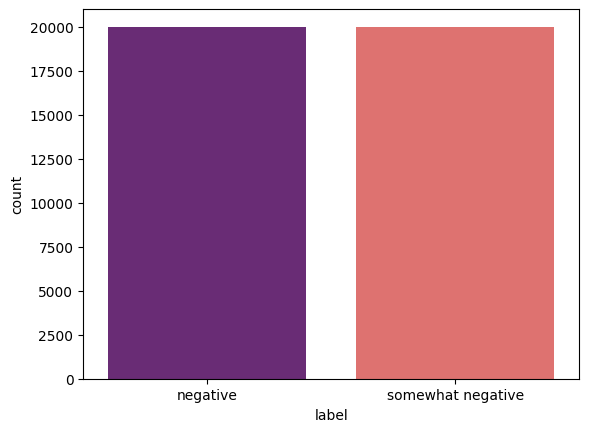

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=movies['label'],data=movies,palette='magma')

array([<Axes: ylabel='text'>], dtype=object)

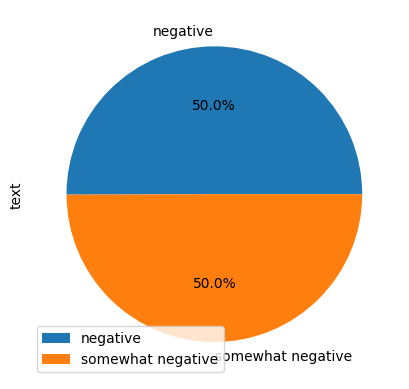

In [41]:
movies.groupby('label').count().plot(kind='pie', autopct='%1.1f%%',subplots=True)

In [42]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test =model_selection.train_test_split(movies['text'],movies['label'],test_size=0.3,random_state=42)
Y_test

32823             negative
16298    somewhat negative
28505             negative
6689     somewhat negative
26893    somewhat negative
               ...        
3779     somewhat negative
11973    somewhat negative
35668             negative
483               negative
1380     somewhat negative
Name: label, Length: 12000, dtype: object

In [43]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer=CountVectorizer(lowercase=True,stop_words='english') 
X_train_new=vectorizer.fit_transform(X_train) 
X_train_new

<28000x79922 sparse matrix of type '<class 'numpy.int64'>'
	with 2476083 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.linear_model import LogisticRegression,SGDRegressor,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

model=LogisticRegression()
model.fit(X_train_new,Y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
X_test_new=vectorizer.transform(X_test) 
prediction=model.predict(X_test_new)
prediction
print(movies.groupby('label').size())

label
negative             20019
somewhat negative    19981
dtype: int64


In [47]:
negatives = movies[movies['label']== 'negative']
negatives
somewhat_negatives = movies[movies['label']== 'somewhat negative']
somewhat_negatives

,text,label
4,Im a die hard Dads Army fan and nothing will e...,somewhat negative
6,Finally watched this shocking movie last night...,somewhat negative
8,It may be the remake of 1987 Autumn's Tale aft...,somewhat negative
9,My Super Ex Girlfriend turned out to be a plea...,somewhat negative
10,I can't believe people are looking for a plot ...,somewhat negative
...,...,...
39992,Although I agree that it's a good but not grea...,somewhat negative
39995,"""Western Union"" is something of a forgotten cl...",somewhat negative
39996,This movie is an incredible piece of work. It ...,somewhat negative
39998,"When I first watched Flatliners, I was amazed....",somewhat negative


In [ ]:
negatives.to_csv('negatives.csv')
somewhat_negatives.to_csv('somewhat_negatives.csv')
